In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import seaborn as sns

Read Files

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
full_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/train.csv')
full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#EDA

In [ ]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

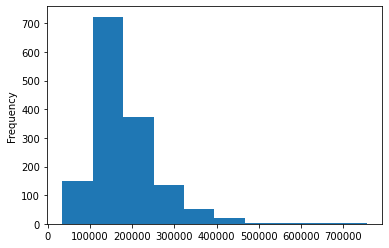

In [ ]:
full_df.SalePrice.plot.hist()

In [ ]:
# Prices grater than 450000 might be outliers
# full_df = full_df[full_df.SalePrice < 450000]
# print(len(df_outliers))
# df_outliers.SalePrice.plot.hist();

###Cleaning Data

In [ ]:
# df2.drop(["Id",],axis=1,inplace=True)
# traindata.drop("Id", axis=1, inplace=True)
# df2.head()
# traindata.head()
# sns.heatmap(traindata.isnull(),yticklabels=False, cbar=False)
def checkNullValues(cData):
  for col in cData:
    # print(col)
    if cData[col].isnull().sum() > 0:
      print(col, cData[col].isnull().sum(), cData[col].dtype)

# print('Train Data Shape', traindata.shape)
checkNullValues(full_df)

LotFrontage 259 float64
Alley 1369 object
MasVnrType 8 object
MasVnrArea 8 float64
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageYrBlt 81 float64
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object
PoolQC 1453 object
Fence 1179 object
MiscFeature 1406 object


In [ ]:
full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
full_df.shape

(1460, 81)

In [ ]:
# if((full_df['YearRemodAdd'])>(full_df['YearBuilt'])):
#   full_df['YearRemodAdd']=1
# else:
#   full_df['YearRemodAdd']=0
full_df['YearRemodAdd'] = full_df['YearRemodAdd'] - full_df['YearBuilt']
full_df['ageInYears'] = (full_df['YrSold'] + full_df['MoSold']/12) - full_df['YearBuilt']

In [ ]:
full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ageInYears
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5.166667
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31.416667
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7.750000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91.166667
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,9.000000


In [ ]:
full_df.drop(['YrSold','MoSold','YearBuilt'], axis=1, inplace=True)

In [ ]:
'''
***to fill the missing data, fuction will reduce lines as well as save me from repeation. Now ***Keep in mind***
****Use that Fuction After you have Droped All the Columns which you think they need to be droped*******
'''
def filldata(cData):
  for col in cData:
    # print(col)
    if cData[col].isnull().sum() > 0:
      if cData[col].dtype == 'float64':
        # print(col, cData[col].isnull().sum(), cData[col].dtype)
        cData[col] = cData[col].fillna(cData[col].mean())
      elif cData[col].dtype == 'object':
        cData[col] = cData[col].fillna(cData[col].mode()[0])

In [ ]:
# traindata['LotFrontage'].isnull().sum()

In [ ]:
checkNullValues(full_df)

LotFrontage 259 float64
Alley 1369 object
MasVnrType 8 object
MasVnrArea 8 float64
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageYrBlt 81 float64
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object
PoolQC 1453 object
Fence 1179 object
MiscFeature 1406 object


In [ ]:
full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,ageInYears
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,208500,5.166667
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,181500,31.416667
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,223500,7.750000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000,91.166667
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,250000,9.000000


Dropping Those Columns which have more than 50% (more than 750) missing values

In [ ]:
full_df.drop(['Id'], axis=1, inplace=True)
full_df.drop(['Alley'], axis=1, inplace=True)
full_df.drop(['PoolQC'], axis=1, inplace=True)
full_df.drop(['Fence'], axis=1, inplace=True)
full_df.drop(['MiscFeature'], axis=1, inplace=True)

In [ ]:
full_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,ageInYears
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,13.597945,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,37.074772
std,42.300571,24.284752,9981.264932,1.382997,1.112799,24.476465,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.246761
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.083333
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.229167
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.500000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,20.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.916667
max,190.000000,313.000000,215245.000000,10.000000,9.000000,123.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,137.000000


In [ ]:
filldata(full_df)

In [ ]:
full_df.shape

(1460, 74)

In [ ]:
# data = traindata['MSZoning'].value_counts()
# names = list(data.keys())
# print(names)
# print(data.dtype)
# values = list(data.values())
# plt.bar(names, values)
# plt.show()
# import seaborn as sns

Categorical Features

In [ ]:
cat_features = full_df.select_dtypes(include=['object']).copy()

In [ ]:
cat_df_cols = list(cat_features.columns)
full_df[cat_df_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [ ]:
cont_df = full_df.drop(cat_df_cols, axis = 1)
cont_df_cols = list(cont_df.columns)
# full_df[cont_df_cols] = scaler.fit_transform(full_df[cont_df_cols])
# full_df[cont_df_cols] = normalizer.fit_transform(full_df[cont_df_cols])
# normalized_df[cont_df_cols] = normalizer.fit_transform(normalized_df[cont_df_cols])

###One Hot Encoding

Function For OneHot Encodding

In [ ]:
def onehot_encode_multcol(multcolumns):
  df_final = full_df
  i = 0
  for fields in multcolumns:
    print(fields)
    dataframe = pd.get_dummies(full_df[fields],drop_first=True)
    full_df.drop([fields],axis=1,inplace=True)
    if i==0:
      df_final = dataframe.copy()
    else:
      df_final = pd.concat([df_final,dataframe], axis=1)
    i = i +1
 
  df_final = pd.concat([full_df,df_final], axis=1)
  return df_final

OneHot Encoding

In [ ]:
full_df = onehot_encode_multcol(cat_df_cols)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
full_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,0,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,1,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,55,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,0,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
full_df.shape

(1460, 235)

In [ ]:
full_df = full_df.loc[:,~full_df.columns.duplicated()]
full_df.shape

(1460, 175)

###Correlation

In [ ]:
correlation = full_df.corr()
# plt.figure(figsize=(15,15))
# sns.heatmap(correlation, annot=True)
correlation['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
                 ...   
No            -0.319990
Detchd        -0.354141
None          -0.367456
ageInYears    -0.523063
TA            -0.589044
Name: SalePrice, Length: 175, dtype: float64

Dropping Least Co-Related Features

In [ ]:
sale_correlation = correlation['SalePrice'].sort_values(ascending=False)
# small_corr = sale_correlation[(sale_correlation < 0.1) & (sale_correlation > - 0.1)]
# small_corr = sale_correlation[(sale_correlation < 0.2) & (sale_correlation > - 0.2)]
# small_corr = sale_correlation[(sale_correlation < 0.3) & (sale_correlation > - 0.3)]
# small_corr = sale_correlation[(sale_correlation < 0.4) & (sale_correlation > - 0.4)]
# small_corr = sale_correlation[(sale_correlation < 0.5) & (sale_correlation > - 0.5)]
'''While tring to find which threshold of correlation should  be droped.
we discovered that increasing the absolute of (mode of) corelation more 0.1 decreases accuracy (increase in error)
and
decreasing the absolute of (mode of) corelation from 0.05 decreases accuracy (increase in error)
'''
# small_corr = sale_correlation[(sale_correlation < 0.04) & (sale_correlation > - 0.04)]
# small_corr = sale_correlation[(sale_correlation < 0.075) & (sale_correlation > - 0.075)]
small_corr = sale_correlation[(sale_correlation < 0.05) & (sale_correlation > - 0.05)]
drop_cols = list(small_corr.keys())
print(drop_cols)
# drop_cols
full_df.drop(drop_cols, axis=1, inplace=True)
full_df.shape
# for names in sale_correlation:
# sale_correlation[0:7]
# df_sale_corr = sale_correlation.to_frame()
# df_sale_corr

['PosN', 'Low', 'Other', 'WdShake', '3SsnPorch', 'Mn', 'Mod', 'PosA', 'Con', 'Pave', 'IR3', '2.5Fin', 'Stone', 'Gilbert', 'BrkFace', 'Sev', 'ImStucc', 'NWAmes', 'RRNn', 'Shed', 'Membran', 'CWD', 'FR3', 'SawyerW', 'ConLI', 'RRAn', 'Tar&Grv', 'RRNe', 'TwnhsE', 'Wood', 'Metal', 'Mansard', 'FR2', 'BsmtFinSF2', 'NoSeWa', 'Roll', 'Alloca', 'BsmtHalfBath', 'Plywood', 'GasW', 'Blueste', 'MiscVal', 'CBlock', 'LowQualFinSF', 'OthW', '2.5Unf', 'AsphShn', 'ConLw', 'Lvl', 'Basment', 'Stucco', 'Po', 'Oth', 'Gambrel', 'Mix', 'NPkVill', 'SLvl', 'Wd Shng', 'ConLD', 'Family', 'RRAe', 'Brk Cmn', 'FuseP']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1460, 112)

In [ ]:
full_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BuiltIn,CarPort,Detchd,RFn,P,New,WD,AdjLand,Normal,Partial
0,60,65.0,8450,7,5,0,196.0,706,150,856,...,0,0,0,1,0,0,1,0,1,0
1,20,80.0,9600,6,8,0,0.0,978,284,1262,...,0,0,0,1,0,0,1,0,1,0
2,60,68.0,11250,7,5,1,162.0,486,434,920,...,0,0,0,1,0,0,1,0,1,0
3,70,60.0,9550,7,5,55,0.0,216,540,756,...,0,0,1,0,0,0,1,0,0,0
4,60,84.0,14260,8,5,0,350.0,655,490,1145,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
# df_Train = full_df.iloc[:1460,:]
# df_Test = full_df.iloc[1460:,:]

###Scalling

In [ ]:
scaler = StandardScaler(copy=False)
# scaler.fit_transform(X.f3.values.reshape(-1, 1))
normalizer = MinMaxScaler()
# X_scaled = scaler.transform(X_train

In [ ]:
normalized_df = full_df.drop(['SalePrice'],axis=1).copy()
# print(normalized_df.shape)
stand_df = full_df.drop(['SalePrice'],axis=1).copy()
target_values = full_df ['SalePrice']
full_df.drop(['SalePrice'],axis=1, inplace=True)
normalized_df = normalizer.fit_transform(normalized_df)
stand_df = scaler.fit_transform(stand_df)


normalized_df

###Splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(full_df, target_values, test_size=0.2, random_state=1)
normalized_x_train, normalized_x_test, normalized_y_train, normalized_y_test = train_test_split(normalized_df, target_values, test_size=0.2, random_state=1)
stand_x_train, stand_x_test, stand_y_train, stand_y_test = train_test_split(stand_df, target_values, test_size=0.2, random_state=1)


###Regression

In [ ]:
reg = linear_model.LinearRegression()
nor = linear_model.LinearRegression()
stand = linear_model.LinearRegression()

In [ ]:
# Training model
reg.fit(x_train,y_train)
nor.fit(normalized_x_train, normalized_y_train)
stand.fit(stand_x_train, stand_y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
y_predict = reg.predict(x_test)
train_predict = reg.predict(x_train)
stand_predict = stand.predict(stand_x_test)
nor_predict = nor.predict(normalized_x_test)
stand_train_pred = stand.predict(stand_x_train)
nor_train_pred = nor.predict(normalized_x_train)

###Raw Data

In [ ]:
print('Errors on Training Dataset')
print('Absolute Error',mean_absolute_error(y_train, train_predict))
print('Squared Error',mean_squared_error(y_train, train_predict))
print('Root mean Squred Error',np.sqrt(mean_squared_error(y_train, train_predict)))
print('R Squared', r2_score(y_train, train_predict))

Errors on Training Dataset
Absolute Error 16834.00995921959
Squared Error 730246244.5950967
Root mean Squred Error 27023.068748665402
R Squared 0.8801345479916727


In [ ]:
y_train

921     145900
520     106250
401     164990
280     228500
1401    193000
         ...  
715     165000
905     128000
1096    127000
235      89500
1061     81000
Name: SalePrice, Length: 1168, dtype: int64

In [ ]:
print('Errors on Testing Dataset')
print('Absolute Error',mean_absolute_error(y_test, y_predict))
print('Squared Error',mean_squared_error(y_test, y_predict))
print('Root mean Squred Error',np.sqrt(mean_squared_error(y_test, y_predict)))
print('R Squared', r2_score(y_test, y_predict))

Errors on Testing Dataset
Absolute Error 19104.270577495816
Squared Error 1123087195.1047091
Root mean Squred Error 33512.493119800994
R Squared 0.84252718567545


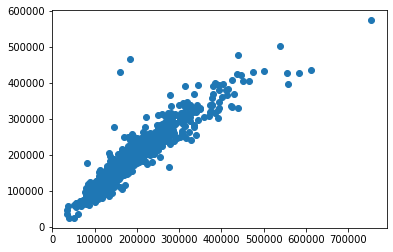

In [ ]:
plt.scatter(y_train, train_predict)

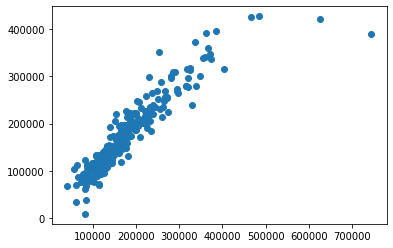

In [ ]:
plt.scatter(y_test, y_predict)

###Normalized

In [ ]:
print('Normalized')
print('Errors on Training Dataset')
print('Absolute Error',mean_absolute_error(normalized_y_train, nor_train_pred))
print('Squared Error',mean_squared_error(normalized_y_train, nor_train_pred))
print('Root mean Squred Error',np.sqrt(mean_squared_error(normalized_y_train, nor_train_pred)))
print('R Squared', r2_score(normalized_y_train, nor_train_pred))

Normalized
Errors on Training Dataset
Absolute Error 16834.00995921894
Squared Error 730246244.5950967
Root mean Squred Error 27023.068748665402
R Squared 0.8801345479916727


In [ ]:
print('Normalized')
print('Errors on Test Dataset')
print('Absolute Error',mean_absolute_error(normalized_y_test, nor_predict))
print('Squared Error',mean_squared_error(normalized_y_test, nor_predict))
print('Root mean Squred Error',np.sqrt(mean_squared_error(normalized_y_test, nor_predict)))
print('R Squared', r2_score(normalized_y_test, nor_predict))

Normalized
Errors on Test Dataset
Absolute Error 19104.270577491385
Squared Error 1123087195.104324
Root mean Squred Error 33512.493119795254
R Squared 0.8425271856755041


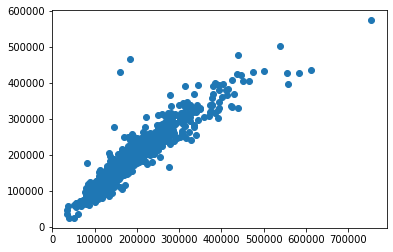

In [ ]:
plt.scatter(normalized_y_train, nor_train_pred)

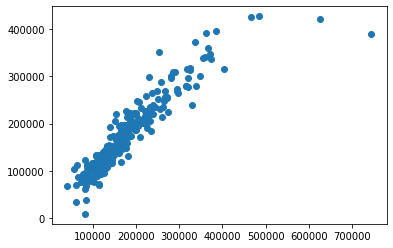

In [ ]:
plt.scatter(normalized_y_test, nor_predict)

###Standardized

In [ ]:
print('Standardized')
print('Errors on Training Dataset')
print('Absolute Error',mean_absolute_error(stand_y_train, stand_train_pred))
print('Squared Error',mean_squared_error(stand_y_train, stand_train_pred))
print('Root mean Squred Error',np.sqrt(mean_squared_error(stand_y_train, stand_train_pred)))
print('R Squared', r2_score(stand_y_train, stand_train_pred))

Standardized
Errors on Training Dataset
Absolute Error 16834.00995921894
Squared Error 730246244.5950967
Root mean Squred Error 27023.068748665402
R Squared 0.8801345479916727


In [ ]:
print('Standardized')
print('Errors on Testing Dataset')
print('Absolute Error',mean_absolute_error(stand_y_test, stand_predict))
print('Squared Error',mean_squared_error(stand_y_test, stand_predict))
print('Root mean Squred Error',np.sqrt(mean_squared_error(stand_y_test, stand_predict)))
print('R Squared', r2_score(stand_y_test, stand_predict))

Standardized
Errors on Testing Dataset
Absolute Error 19104.270577491367
Squared Error 1123087195.1043234
Root mean Squred Error 33512.49311979524
R Squared 0.8425271856755041


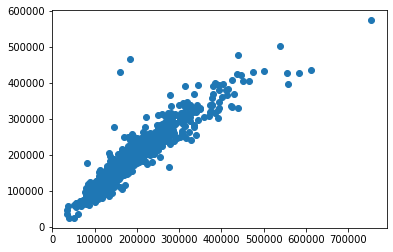

In [ ]:
plt.scatter(stand_y_train, stand_train_pred)

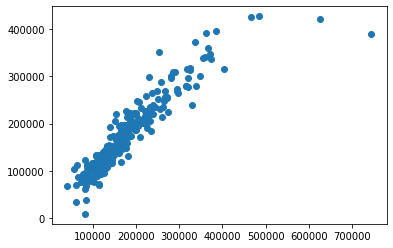

In [ ]:
plt.scatter(stand_y_test, stand_predict)